In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
plt.close()

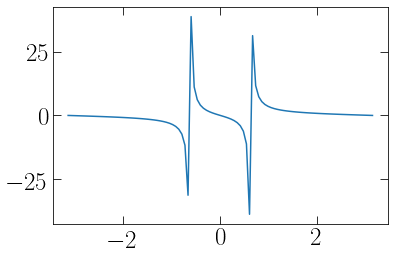

In [34]:
def RVM(phi,alpha,zeta):
    y=np.sin(alpha)*np.sin(phi)
    x=np.cos(alpha)*np.sin(zeta)-np.sin(alpha)*np.cos(zeta)*np.cos(phi)
    tpsi= y/x
#     print(psi)
    return tpsi

phi=np.linspace(-pi,pi,100)
alpha=30/180*pi
zeta=25/180*pi
tan=RVM(phi,alpha,zeta)
plt.plot(phi,tan)

# RVM model of pulsar

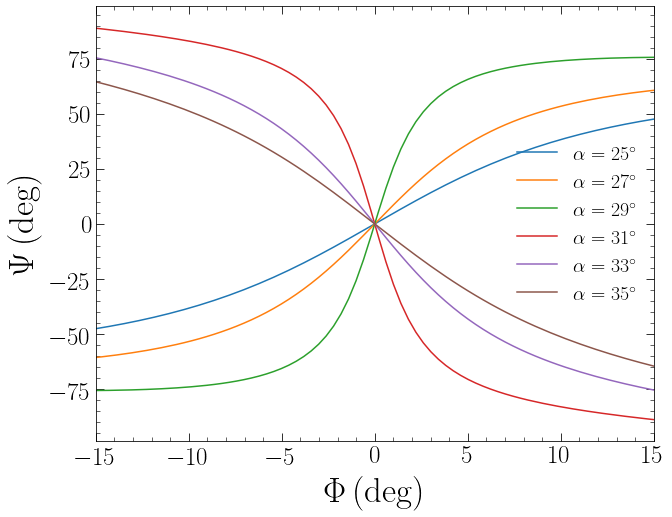

In [84]:
# alpha 35-45deg
labels=np.array([r'$\alpha=25^{\circ}$',r'$\alpha=27^{\circ}$',\
                 r'$\alpha=29^{\circ}$',r'$\alpha=31^{\circ}$',r'$\alpha=33^{\circ}$',r'$\alpha=35^{\circ}$'])
def RVM_rotation(phi,alpha,zeta):
    y=np.sin(alpha)*np.sin(phi)
    x=np.cos(alpha)*np.sin(zeta)-np.sin(alpha)*np.cos(zeta)*np.cos(phi)
    psi= np.arctan(y/x)
#     print(psi)
    return psi


plt.figure(figsize=(10,8))
alpha=np.array([25,27,29,31,33,35])
for j in range(len(alpha)):
    phi=np.linspace(-40/180*pi,40/180*pi,200)
    psi=np.zeros(len(phi))
    for i in range(len(phi)):
        psi[i]=RVM_rotation(phi[i],alpha[j]/180*pi,30/180*pi)
    plt.plot(phi/pi*180,psi/pi*180,label=labels[j])


plt.xlim(-15,15)
plt.minorticks_on()
plt.ylabel(r'$\Psi\,(\rm deg)$',fontsize=35)
plt.xlabel(r'$\Phi\,(\rm deg)$',fontsize=35)
plt.legend(fontsize=20,frameon=False,ncol=1)
plt.savefig('/Users/yonggao/desktop/psi.pdf',format='pdf')

In [23]:
def RVM_rotation(phi,alpha,zeta):
    y=np.sin(alpha)*np.sin(phi)
    x=np.cos(alpha)*np.sin(zeta)-np.sin(alpha)*np.cos(zeta)*np.cos(phi)
    psi= np.arctan(y/x)
#     print(psi)
    return psi

RVM_rotation(0,45/180*pi,40/180*pi)/pi*180

-0.0

# RVM model of precessing biaxial pulsar

In [1]:
def magnetic_inclination(t, theta, T, P, chi):

    psi=-2*pi/T*t+pi/2
    return np.arccos(np.sin(theta)*np.sin(psi)*np.sin(chi)+np.cos(theta)*np.cos(chi))

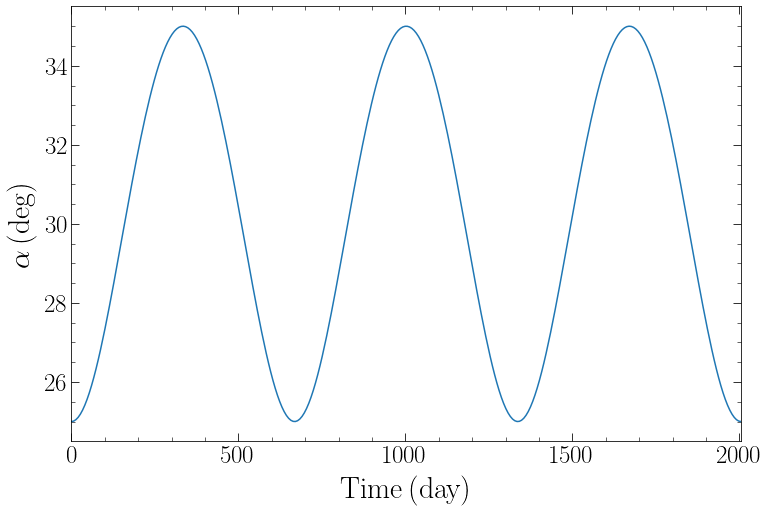

In [48]:
epsilon=1e-7
P=5
chi=5/180*pi
theta=30/180*pi
T=P/epsilon/np.cos(theta)
t=np.linspace(0,3*T,300)
alpha=np.zeros(len(t))
for i in range(len(t)):
    alpha[i]=magnetic_inclination(t[i],theta,T,P,chi)/pi*180
    

plt.figure(figsize=(12,8))    
plt.plot(t/24/3600,alpha)
plt.xlabel(r'$\rm Time\,(\rm day)$',fontsize=30)
plt.ylabel(r'$\alpha\, (\rm deg)$',fontsize=30)
plt.xlim(0,3*T/24/3600)
plt.minorticks_on()

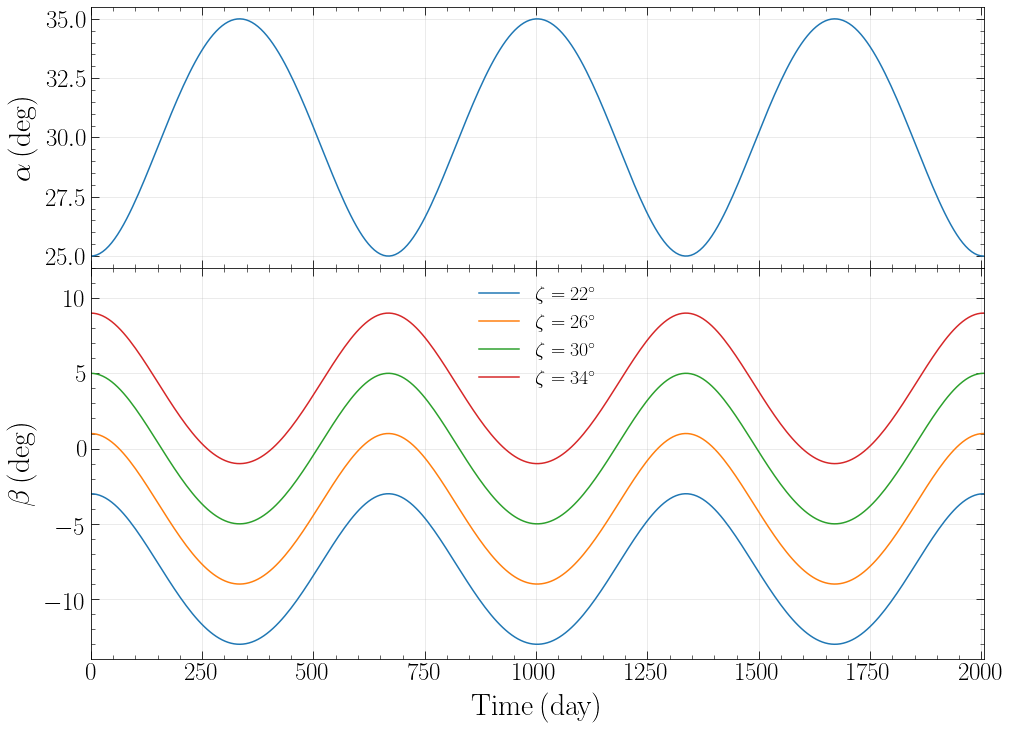

In [90]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(16,12), gridspec_kw={'height_ratios': [1, 1.5]},sharex=True)
plt.subplots_adjust(hspace=0)
labels=np.array([r'$\zeta=22^{\circ}$',r'$\zeta=26^{\circ}$',r'$\zeta=30^{\circ}$',r'$\zeta=34^{\circ}$'])

epsilon=1e-7
P=5
chi=5/180*pi
theta=30/180*pi
T=P/epsilon/np.cos(theta)
t=np.linspace(0,3*T,300)
alpha=np.zeros(len(t))
beta=np.zeros(len(t))
zeta=np.array([22,26,30,34])
for j in range(len(zeta)):
    
    for i in range(len(t)):
        alpha[i]=magnetic_inclination(t[i],theta,T,P,chi)/pi*180
        beta[i]=zeta[j]-alpha[i]
    
    ax2.plot(t/24/3600,beta,label=labels[j])
    
ax1.plot(t/24/3600,alpha)
ax1.set_xlim(0,3*T/24/3600)
ax2.set_ylim(-14,12)
ax1.minorticks_on()
ax2.minorticks_on()
plt.legend(fontsize=20,frameon=False)
ax2.set_xlabel(r'$\rm Time\,(\rm day)$',fontsize=30)
ax1.set_ylabel(r'$\alpha\, (\rm deg)$',fontsize=30)
ax2.set_ylabel(r'$\beta\, (\rm deg)$',fontsize=30)
plt.savefig('/Users/yonggao/desktop/ab.pdf',format='pdf')
ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)

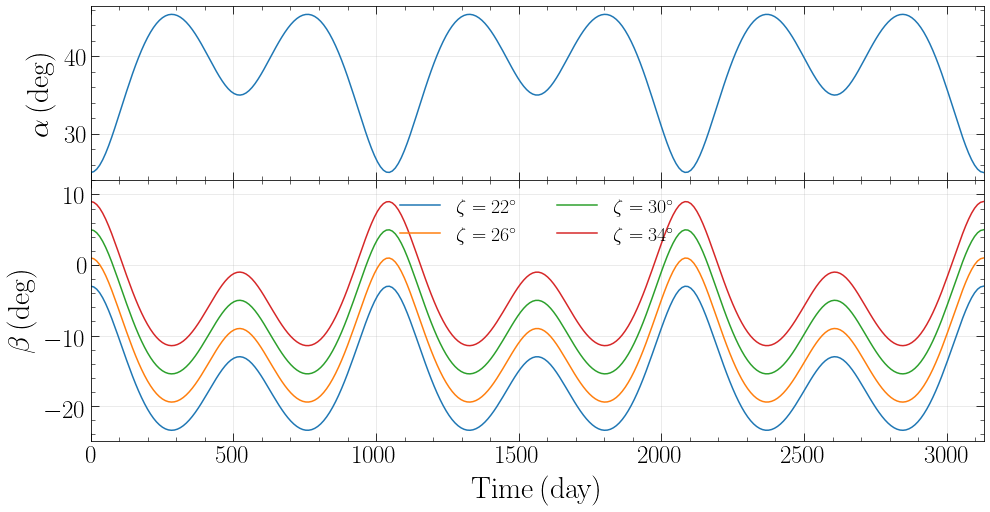

In [125]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(16,8), gridspec_kw={'height_ratios': [1, 1.5]},sharex=True)
plt.subplots_adjust(hspace=0)
labels=np.array([r'$\zeta=22^{\circ}$',r'$\zeta=26^{\circ}$',r'$\zeta=30^{\circ}$',r'$\zeta=34^{\circ}$'])

from math import radians as radian
from numpy import linalg as LA
from scipy.special import ellipj
from scipy.special import ellipk

def magnetic_inclination(t, theta0, delta, epsilon, P, chi):

    omega0=2*pi/P
    m=delta*(1+epsilon)*np.tan(theta0)**2
    omegap=np.cos(theta0)*omega0*epsilon*(1+delta+delta*epsilon)**(-1/2)
    
    sn=ellipj(omegap*t,m)[0]
    
    cn=ellipj(omegap*t,m)[1]
    
    dn=ellipj(omegap*t,m)[2]
    
    theta=np.arccos(np.cos(theta0)*dn)
   
    psi=np.arctan2((1+delta+delta*epsilon)**(-1/2)*cn,sn)

    return np.arccos(np.sin(theta)*np.sin(psi)*np.sin(chi)+np.cos(theta)*np.cos(chi))


epsilon=1e-7
delta=1
P=5
chi=5/180*pi
theta0=30/180*pi
omega0=2*pi/P
m=delta*(1+epsilon)*np.tan(theta0)**2
omegap=np.cos(theta0)*omega0*epsilon*(1+delta+delta*epsilon)**(-1/2)
T=4*ellipk(m)*(1+delta+delta*epsilon)**(1/2)/np.cos(theta0)/omega0/epsilon
t=np.linspace(0,3*T,300)
alpha=np.zeros(len(t))
beta=np.zeros(len(t))
zeta=np.array([22,26,30,34])
for j in range(len(zeta)):
    for i in range(len(t)):
        
        alpha[i]=magnetic_inclination(t[i],theta0,delta,epsilon, P, chi)/pi*180
        beta[i]=zeta[j]-alpha[i]
    ax2.plot(t/24/3600,beta,label=labels[j])
    
ax1.plot(t/24/3600,alpha)
ax1.set_xlim(0,3*T/24/3600)
ax2.set_ylim(-25,12)
ax1.minorticks_on()
ax2.minorticks_on()
ax2.legend(fontsize=20,frameon=False,ncol=2)
ax2.set_xlabel(r'$\rm Time\,(\rm day)$',fontsize=30)
ax1.set_ylabel(r'$\alpha\, (\rm deg)$',fontsize=30)
ax2.set_ylabel(r'$\beta\, (\rm deg)$',fontsize=30)
plt.savefig('/Users/yonggao/desktop/ab.pdf',format='pdf')
ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)